In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [2]:
# Importing dataset
df = pd.read_csv('Social_enterpreneurship_dataset.csv')

In [3]:
# Explore dataset (first glance)
df.head()

,project_name,project_location,project_founder,fund_goal,fund_currency,fund_progress,fund_date_end,fund_supporter,category,goal_tipping point,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,"Philadelphia, United States",Bianca Nikol Roberson Memorial Foundation Inc ...,"25,000",USD,"4,142","'Fundraising ended on Mar 27, 2019",56.0,Civic;Community;Social Enterprise;,"25,000",...,3.08,1.03,0.0,0.00,1.03,0.00,0.68,1.37,0.00,0.68
1,Help People with a Disability in Maleny,"Maleny, Sunshine Coast, Queensland, Australia",Kristine FitzGerald,"20,000",AUD,"2,811","'Fundraising ended on Apr 08, 2018",26.0,Arts & Culture;Community;Social Enterprise;,"20,000",...,5.05,0.51,0.0,0.25,0.00,0.76,0.00,0.00,0.00,0.00
2,You Can Help Us Launch The Priceless Campaign,Lancaster,The Priceless Campaign,"2,200",USD,"1,345","'Fundraising ended on Dec 23, 2012",13.0,Children & Youth;,"2,200",...,4.64,0.00,0.0,0.71,3.21,1.07,0.71,0.00,0.00,1.43
3,"""It is not the mountain we conquer but ourselv...","Lindome , Sweden",Josefine Steenari,"30,000",SEK,"2,400","'Fundraising ended on May 30, 2018",6.0,Civic;Community;Human Rights;,"30,000",...,3.06,1.53,0.0,0.00,0.92,0.71,1.02,0.71,0.82,3.06
4,#APATCE - Empowering Tourism for All,"Canberra, Australia",getaboutable.com,"20,000",AUD,"20,090","'Nov 15, 2019",74.0,Arts & Culture;Human Rights;Social Enterprise;,"20,000",...,4.01,1.08,0.0,0.00,0.15,2.00,0.31,2.00,1.85,6.16


In [4]:
# Explore dataset - shape
df.shape

(1474, 105)

## Choosing and renaming columns

In [5]:
# Explore column names and null values
df.isna().sum().head(50)

project_name           0
project_location       0
project_founder        0
fund_goal              0
fund_currency          0
fund_progress          0
fund_date_end          0
fund_supporter         6
category               1
goal_tipping point     0
goal_stretch point     0
percentagefunded       0
percstretch            0
Word_count            36
Analytic              36
Clout                 36
Authentic             36
Tone                  36
Words_per_sentence    36
Sixltr                36
function              36
pronoun               36
ppron                 36
i                     36
we                    36
you                   36
shehe                 36
they                  36
ipron                 36
article               36
prep                  36
auxverb               36
adverb                36
conj                  36
negate                36
verb                  36
adj                   36
compare               36
interrog              36
number                36


In [6]:
# Selection of relevant columns
df = df[['project_name', 'project_founder', 'project_location', 'category', 'fund_date_end', 'fund_currency', 'fund_goal', 'goal_tipping point', 'goal_stretch point', 'fund_progress', 'percentagefunded', 'percstretch', 'fund_supporter', 'Word_count']]
df.shape

(1474, 14)

In [7]:
# Renaming columns
df.columns = ['title', 'founder', 'location', 'topic', 'year', 'currency', 'funding_goal', 'funding_goal_tipping_point', 'funding_goal_stretch_point', 'funding_raised', 'percentage_of_goal', 'percentage_of_goal_stretch', 'number_of_supporters', 'word_count_description']

In [8]:
# Check renaming success
df.columns

Index(['title', 'founder', 'location', 'topic', 'year', 'currency',
       'funding_goal', 'funding_goal_tipping_point',
       'funding_goal_stretch_point', 'funding_raised', 'percentage_of_goal',
       'percentage_of_goal_stretch', 'number_of_supporters',
       'word_count_description'],
      dtype='object')

## Column clean up: Currency and related columns

#### General

In [9]:
# Checking for missing values in currency-related columns (none)
df[['currency', 'funding_goal', 'funding_goal_tipping_point', 'funding_goal_stretch_point', 'funding_raised']].isna().sum()

currency                      0
funding_goal                  0
funding_goal_tipping_point    0
funding_goal_stretch_point    0
funding_raised                0
dtype: int64

In [10]:
# Checking for datatypes
df[['currency', 'funding_goal', 'funding_goal_tipping_point', 'funding_goal_stretch_point', 'funding_raised']].dtypes

currency                      object
funding_goal                  object
funding_goal_tipping_point    object
funding_goal_stretch_point    object
funding_raised                object
dtype: object

In [11]:
# Converting datatypes of numerical columns from string to float
df['funding_goal'] = df['funding_goal'].apply(lambda x: x.replace(",","") if isinstance(x, str) else x).astype(float)
df['funding_goal_tipping_point'] = df['funding_goal_tipping_point'].apply(lambda x: x.replace(",","") if isinstance(x, str) else x).astype(float)
df['funding_goal_stretch_point'] = df['funding_goal_stretch_point'].apply(lambda x: x.replace(",","") if isinstance(x, str) else x).astype(float)
df['funding_raised'] = df['funding_raised'].apply(lambda x: x.replace(",","") if isinstance(x, str) else x).astype(float)

In [12]:
# Check if floats now (yes)
df[['currency', 'funding_goal', 'funding_goal_tipping_point', 'funding_goal_stretch_point', 'funding_raised']].dtypes

currency                       object
funding_goal                  float64
funding_goal_tipping_point    float64
funding_goal_stretch_point    float64
funding_raised                float64
dtype: object

#### Cleaning up funding_goal, funding_goal_tipping_point, and 

In [13]:
# Check if funding_goal = funding_goal_tipping_point (the difference is not 0, which means, there are cases in which not)
df['difference'] = df['funding_goal'] - df['funding_goal_tipping_point']
df['difference'].sum()

68000.0

In [14]:
# Checking for these cases
df[(df['funding_goal'] - df['funding_goal_tipping_point'] != 0)]

,title,founder,location,topic,year,currency,funding_goal,funding_goal_tipping_point,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description,difference
213,Championing Financially Responsible African Women,Bernie Akporiaye,"Nation-wide, Senegal",Community;Economic Development;Social Enterprise;,"'Fundraising ended on Sep 08, 2017",USD,30000.0,0.0,0.0,8110.0,#DIV/0!,#DIV/0!,44.0,NaN,30000.0
546,Growing Through – Revolutionizing Crisis Support,"Humannovations/Red Lever Innovations, LLC","Los Angeles, United States",Community;Health;Human Rights;,"'Fundraising ended on Dec 13, 2019",USD,33000.0,0.0,0.0,3297.0,#DIV/0!,#DIV/0!,18.0,NaN,33000.0
675,Help Us Plant 1000 Trees In Parramatta,usama ali,"Parramatta, Australia",Community;Environment;Social Enterprise;,"'Fundraising ended on Oct 11, 2019",AUD,5000.0,0.0,0.0,890.0,#DIV/0!,#DIV/0!,8.0,185.0,5000.0


In [15]:
# Removing difference (as we don't need it anymore)
df = df.drop('difference',axis=1)

In [16]:
# As there are only 3 cases, we conclude that funding_goal and funding_goal_tipping_point are meant to be the same.
df = df.drop('funding_goal_tipping_point',axis=1)

#### Converting all currency-related columns to USD

In [17]:
# Exploring unique currencies
df['currency'].value_counts()

currency
USD       862
AUD       410
EUR        70
GBP        66
CAD        32
SGD         6
CHFCHF      5
SEK         4
MXN         3
RZAR        2
KSKES       2
COP         2
NZD         2
NGN         1
INR         1
JPY         1
MAD         1
DKK         1
HKD         1
FJD         1
NOK         1
Name: count, dtype: int64

In [18]:
# Mapping the exchange rates as of Nov 16, 2020 (day the dataset was published)
# Source: https://fxtop.com/en/historical-currency-converter.php)

exchange_rates = {
'USD': 1,
'AUD': 0.729077,
'EUR': 1.183,
'GBP': 1.317093,
'CAD': 0.764409,
'SGD': 0.742438,
'CHFCHF': 1.093447,
'SEK': 0.115372,
'MXN': 0.049323,
'RZAR': 0.064877,
'KSKES': 0.009154,
'COP': 0.000275,
'NZD': 0.686713,
'NGN': 0.002646,
'INR': 0.013431,
'JPY': 0.009529,
'MAD': 0.109543,
'DKK': 0.158835,
'HKD': 0.128972,
'FJD': 0.475678,
'NOK': 0.110241
}

In [19]:
# Creating a column with exchange rates that applies to the case
df['exchange_rate'] = df['currency'].apply(lambda x: exchange_rates.get(x,x))

# Check: Correct value? (yes)
df[['currency', 'exchange_rate']].head()

,currency,exchange_rate
0,USD,1.000000
1,AUD,0.729077
2,USD,1.000000
3,SEK,0.115372
4,AUD,0.729077


In [20]:
# Check: Correct datatype? (yes)
df[['currency', 'exchange_rate']].dtypes

currency          object
exchange_rate    float64
dtype: object

In [21]:
#df.loc["index_label", "column_name"] # Accessing a cell
#df['funding_goal_usd'] = df['funding_goal'].apply(lambda x: x * df.loc[x.name, 'funding_goal'])
df['funding_goal'] = round((df['funding_goal'] * df['exchange_rate']), 2)
df['funding_goal_stretch_point'] = round((df['funding_goal_stretch_point'] * df['exchange_rate']), 2)
df['funding_raised'] = round((df['funding_raised'] * df['exchange_rate']), 2)

# Check (successful)
df[['funding_goal', 'currency', 'exchange_rate', 'funding_goal', 'funding_goal_stretch_point', 'funding_raised']]

,funding_goal,currency,exchange_rate,funding_goal,funding_goal_stretch_point,funding_raised
0,25000.00,USD,1.000000,25000.00,30000.00,4142.00
1,14581.54,AUD,0.729077,14581.54,25517.70,2049.44
2,2200.00,USD,1.000000,2200.00,6500.00,1345.00
3,3461.16,SEK,0.115372,3461.16,6922.32,276.89
4,14581.54,AUD,0.729077,14581.54,36453.85,14647.16
...,...,...,...,...,...,...
1469,3951.28,GBP,1.317093,3951.28,6585.46,1975.64
1470,10000.00,USD,1.000000,10000.00,20000.00,5000.00
1471,2000.00,USD,1.000000,2000.00,8000.00,30.00
1472,5468.08,AUD,0.729077,5468.08,9113.46,218.72


In [22]:
# Drop exchange_rate column (as we don't need it anymore)
df = df.drop('exchange_rate',axis=1)

In [23]:
# Drop currency column (as all are in USD now)
df = df.drop('currency',axis=1)

In [24]:
# Check dataframe after transformations
df.head()

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,"Philadelphia, United States",Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,30000.00,4142.00,0.16568,0.13807,56.0,292.0
1,Help People with a Disability in Maleny,Kristine FitzGerald,"Maleny, Sunshine Coast, Queensland, Australia",Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,25517.70,2049.44,0.14055,0.08031,26.0,396.0
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,Lancaster,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,6500.00,1345.00,0.61136,0.20692,13.0,280.0
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,"Lindome , Sweden",Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,6922.32,276.89,0.08000,0.04000,6.0,981.0
4,#APATCE - Empowering Tourism for All,getaboutable.com,"Canberra, Australia",Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,36453.85,14647.16,1.00450,0.40180,74.0,649.0


In [25]:
# Check dataframe after transformations
df.dtypes

title                          object
founder                        object
location                       object
topic                          object
year                           object
funding_goal                  float64
funding_goal_stretch_point    float64
funding_raised                float64
percentage_of_goal             object
percentage_of_goal_stretch     object
number_of_supporters          float64
word_count_description        float64
dtype: object

#### Recalculating percentage_of_goal

In [26]:
# Check why percentage_of_goal is type object (apparently, there are floats that are still represented as string type)
stringtypes_percentage = df[[isinstance(value, str) for value in df['percentage_of_goal']]]
stringtypes_percentage.head()

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,"Philadelphia, United States",Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,30000.00,4142.00,0.16568,0.13807,56.0,292.0
1,Help People with a Disability in Maleny,Kristine FitzGerald,"Maleny, Sunshine Coast, Queensland, Australia",Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,25517.70,2049.44,0.14055,0.08031,26.0,396.0
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,Lancaster,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,6500.00,1345.00,0.61136,0.20692,13.0,280.0
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,"Lindome , Sweden",Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,6922.32,276.89,0.08000,0.04000,6.0,981.0
4,#APATCE - Empowering Tourism for All,getaboutable.com,"Canberra, Australia",Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,36453.85,14647.16,1.00450,0.40180,74.0,649.0


In [27]:
# Converting into float produces an error as there are already string values '#DIV/0!' present
# Problem is not in funding_goal so it must stem from funding_goal_tipping_point deleted earlier
# df['percentage_of_goal'] = df['percentage_of_goal'].astype(float)
df[(df['funding_goal'] == 0)].shape

(0, 12)

In [28]:
# Recalculating the percentage_of_goal
df['percentage_of_goal'] = round((df['funding_raised'] / df['funding_goal']), 4)
df.head(10)

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,"Philadelphia, United States",Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,30000.00,4142.00,0.1657,0.13807,56.0,292.0
1,Help People with a Disability in Maleny,Kristine FitzGerald,"Maleny, Sunshine Coast, Queensland, Australia",Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,25517.70,2049.44,0.1406,0.08031,26.0,396.0
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,Lancaster,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,6500.00,1345.00,0.6114,0.20692,13.0,280.0
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,"Lindome , Sweden",Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,6922.32,276.89,0.0800,0.04000,6.0,981.0
4,#APATCE - Empowering Tourism for All,getaboutable.com,"Canberra, Australia",Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,36453.85,14647.16,1.0045,0.40180,74.0,649.0
5,#BlackandHooded Scholarship Fund 2018-19,#BLACKANDHOODED,"New York City, United States",Civic;Community;Education;,"'Fundraising ended on Jul 31, 2018",3000.00,4000.00,1390.00,0.4633,0.34750,31.0,114.0
6,#SwipeItForward,SwipeItForward NYC,"New York City, United States",Community;Human Rights;Politics;,"'Mar 10, 2017",1000.00,2000.00,2410.00,2.4100,1.20500,64.0,152.0
7,1 in Too Campaign,Advocates for Youth Efficacy,"Washington, D.C.",Community;,"'Fundraising ended on Mar 24, 2012",500.00,2000.00,90.00,0.1800,0.04500,5.0,302.0
8,10 For 10 - Help charities drive impact!,Progress 81,"London, United Kingdom",Children & Youth;Community;Social Enterprise;,"'Fundraising ended on Jan 21, 2020",13170.93,26341.86,1226.21,0.0931,0.04655,7.0,457.0
9,100 Miles to End Homelessness,Northampton Exercise Club for the Homeless,"Northampton, MA",Community;Health;,"'Sep 08, 2013",1500.00,2500.00,1858.00,1.2387,0.74320,28.0,145.0


#### Fixing 0 values in funding_goal_stretch_point (by replacing with funding_goal)

In [29]:
# An additional issue is posed by 13 values that are 0 in funding_goal_stretch_point (leading to errors in "percentage_of_goal_stretch")
df[(df['funding_goal_stretch_point'] == 0)].shape

(13, 12)

In [30]:
# Examples of such rows
df[(df['funding_goal_stretch_point'] == 0)].head()

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
52,A Slice of the Cake,Kerry White,"Sunshine Coast, Australia",Community;Food;Social Enterprise;,"'Fundraising ended on Jun 23, 2017",21872.31,0.0,224.56,0.0103,#DIV/0!,6.0,708.0
213,Championing Financially Responsible African Women,Bernie Akporiaye,"Nation-wide, Senegal",Community;Economic Development;Social Enterprise;,"'Fundraising ended on Sep 08, 2017",30000.00,0.0,8110.00,0.2703,#DIV/0!,44.0,NaN
230,Chrysalix: Enhance employability for PWDs,EE JOE CHANG,"Singapore, Singapore",Social Enterprise;,"'Fundraising ended on Apr 22, 2018",20000.00,0.0,250.00,0.0125,#DIV/0!,10.0,1382.0
231,Cinema of the oppressed,cinema of the oppressed,"Sydney , Australia",Arts & Culture;Human Rights;Social Enterprise;,"'Fundraising ended on Nov 23, 2017",3645.38,0.0,991.54,0.2720,#DIV/0!,11.0,163.0
270,Community Hair Project,Chris Marsden,"Australia, Australia",Community;,"'Fundraising ended on May 31, 2017",3645.38,0.0,222.37,0.0610,#DIV/0!,4.0,559.0


In [31]:
# Assuming that these cases did not specify a stretch goal: Creating column specifying whether or not stretch goal was set
df['stretch_goal_no_yes'] = df['funding_goal_stretch_point'].apply(lambda x: 1 if x != 0 else 0)
df['stretch_goal_no_yes'].value_counts()

stretch_goal_no_yes
1    1461
0      13
Name: count, dtype: int64

In [32]:
# Replacing stretch_goal with value 0 with funding_goal
#df['funding_goal_stretch_point'] = df['funding_goal_stretch_point'].apply(lambda x: df.loc[x.name,'funding_goal'] if x == 0 else x)
df['funding_goal_stretch_point'] = np.where(df['funding_goal_stretch_point'] == 0, df['funding_goal'], df['funding_goal_stretch_point'])

In [33]:
# Check if successful (yes, this has worked)
df[['funding_goal', 'funding_goal_stretch_point']].head()
df.loc[[50, 51, 52, 229, 230, 231],['funding_goal', 'funding_goal_stretch_point']]

,funding_goal,funding_goal_stretch_point
50,6000.00,12000.00
51,6000.00,10000.00
52,21872.31,21872.31
229,3000.00,5000.00
230,20000.00,20000.00
231,3645.38,3645.38


#### Recalculating percentage_of_goal_stretch

In [34]:
# Recalculating percentage_of_goal_stretch
df['percentage_of_goal_stretch'] = round((df['funding_raised'] / df['funding_goal_stretch_point']), 4)
df.head(10)

,title,founder,location,topic,year,funding_goal,funding_goal_stretch_point,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description,stretch_goal_no_yes
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,"Philadelphia, United States",Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,30000.00,4142.00,0.1657,0.1381,56.0,292.0,1
1,Help People with a Disability in Maleny,Kristine FitzGerald,"Maleny, Sunshine Coast, Queensland, Australia",Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,25517.70,2049.44,0.1406,0.0803,26.0,396.0,1
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,Lancaster,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,6500.00,1345.00,0.6114,0.2069,13.0,280.0,1
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,"Lindome , Sweden",Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,6922.32,276.89,0.0800,0.0400,6.0,981.0,1
4,#APATCE - Empowering Tourism for All,getaboutable.com,"Canberra, Australia",Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,36453.85,14647.16,1.0045,0.4018,74.0,649.0,1
5,#BlackandHooded Scholarship Fund 2018-19,#BLACKANDHOODED,"New York City, United States",Civic;Community;Education;,"'Fundraising ended on Jul 31, 2018",3000.00,4000.00,1390.00,0.4633,0.3475,31.0,114.0,1
6,#SwipeItForward,SwipeItForward NYC,"New York City, United States",Community;Human Rights;Politics;,"'Mar 10, 2017",1000.00,2000.00,2410.00,2.4100,1.2050,64.0,152.0,1
7,1 in Too Campaign,Advocates for Youth Efficacy,"Washington, D.C.",Community;,"'Fundraising ended on Mar 24, 2012",500.00,2000.00,90.00,0.1800,0.0450,5.0,302.0,1
8,10 For 10 - Help charities drive impact!,Progress 81,"London, United Kingdom",Children & Youth;Community;Social Enterprise;,"'Fundraising ended on Jan 21, 2020",13170.93,26341.86,1226.21,0.0931,0.0465,7.0,457.0,1
9,100 Miles to End Homelessness,Northampton Exercise Club for the Homeless,"Northampton, MA",Community;Health;,"'Sep 08, 2013",1500.00,2500.00,1858.00,1.2387,0.7432,28.0,145.0,1


#### Adding a column that gives us the stretch goal relative to the funding goal

In [35]:
df['relative_stretch_goal'] = round((df['funding_goal_stretch_point'] / df['funding_goal']), 4)

In [36]:
df.columns

Index(['title', 'founder', 'location', 'topic', 'year', 'funding_goal',
       'funding_goal_stretch_point', 'funding_raised', 'percentage_of_goal',
       'percentage_of_goal_stretch', 'number_of_supporters',
       'word_count_description', 'stretch_goal_no_yes',
       'relative_stretch_goal'],
      dtype='object')

#### Re-ordering columns

In [37]:
df = df[['title', 'founder', 'location', 'topic', 'year', 'funding_goal', 'stretch_goal_no_yes', 'funding_goal_stretch_point', 'relative_stretch_goal', 'funding_raised', 'percentage_of_goal', 'percentage_of_goal_stretch', 'number_of_supporters', 'word_count_description']]

#### Final checks

In [38]:
df.head()

,title,founder,location,topic,year,funding_goal,stretch_goal_no_yes,funding_goal_stretch_point,relative_stretch_goal,funding_raised,percentage_of_goal,percentage_of_goal_stretch,number_of_supporters,word_count_description
0,Bianca Nikol Roberson Mural: STOP GUN VIOLENCE!,Bianca Nikol Roberson Memorial Foundation Inc ...,"Philadelphia, United States",Civic;Community;Social Enterprise;,"'Fundraising ended on Mar 27, 2019",25000.00,1,30000.00,1.2000,4142.00,0.1657,0.1381,56.0,292.0
1,Help People with a Disability in Maleny,Kristine FitzGerald,"Maleny, Sunshine Coast, Queensland, Australia",Arts & Culture;Community;Social Enterprise;,"'Fundraising ended on Apr 08, 2018",14581.54,1,25517.70,1.7500,2049.44,0.1406,0.0803,26.0,396.0
2,You Can Help Us Launch The Priceless Campaign,The Priceless Campaign,Lancaster,Children & Youth;,"'Fundraising ended on Dec 23, 2012",2200.00,1,6500.00,2.9545,1345.00,0.6114,0.2069,13.0,280.0
3,"""It is not the mountain we conquer but ourselv...",Josefine Steenari,"Lindome , Sweden",Civic;Community;Human Rights;,"'Fundraising ended on May 30, 2018",3461.16,1,6922.32,2.0000,276.89,0.0800,0.0400,6.0,981.0
4,#APATCE - Empowering Tourism for All,getaboutable.com,"Canberra, Australia",Arts & Culture;Human Rights;Social Enterprise;,"'Nov 15, 2019",14581.54,1,36453.85,2.5000,14647.16,1.0045,0.4018,74.0,649.0


In [39]:
# Check dataframe after transformations
df.dtypes

title                          object
founder                        object
location                       object
topic                          object
year                           object
funding_goal                  float64
stretch_goal_no_yes             int64
funding_goal_stretch_point    float64
relative_stretch_goal         float64
funding_raised                float64
percentage_of_goal            float64
percentage_of_goal_stretch    float64
number_of_supporters          float64
word_count_description        float64
dtype: object

## Column clean up: number_of_supporters

In [40]:
# Turn into integer (float before)
df['number_of_supporters'] = df['number_of_supporters'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [46]:
## Column clean up: word_count

In [50]:
# Explore null values
df['word_count_description'].isna().sum()

36

In [53]:
# Checking the column in general
df['word_count_description'].describe()

count    1438.000000
mean      598.166203
std       453.866322
min         3.000000
25%       310.000000
50%       487.000000
75%       757.250000
max      6093.000000
Name: word_count_description, dtype: float64

<Axes: >

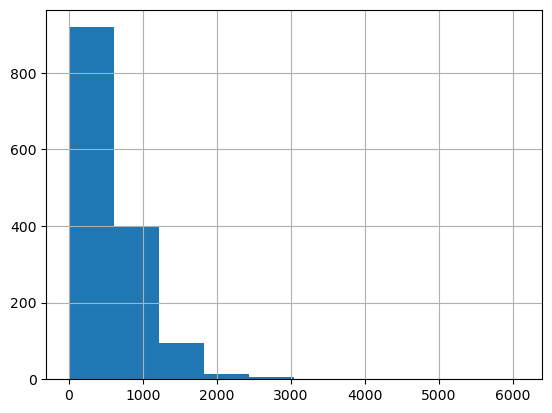

In [57]:
# Checking histogram
df['word_count_description'].hist()

In [54]:
# Checking median
df['word_count_description'].median()

487.0

In [60]:
# Decision: Replacing null values with median (distribution is quite skewed)
df['word_count_description'] = df['word_count_description'].fillna(df['word_count_description'].median())

In [61]:
# Check (success)
df['word_count_description'].isna().sum()

0

## Column clean up: year

In [41]:
# Checking for null values (none)
df['year'].isna().sum()

0

In [42]:
# Checking format - we can extract the last 4 characters of the string
df['year'].value_counts().head(10)

year
'Mar 31, 2013                         7
'Fundraising ended on Nov 28, 2015    6
'Jul 17, 2019                         6
'Fundraising ended on Dec 31, 2014    5
'May 31, 2017                         5
'Fundraising ended on Jul 21, 2014    5
'Jul 18, 2018                         5
'Sep 13, 2013                         4
'Dec 05, 2014                         4
'Fundraising ended on Jul 31, 2017    4
Name: count, dtype: int64

In [45]:
# Extracting the last 4 characters
df['year_test'] = df['year'].apply(lambda x: x[-5:] if isinstance(x, str) else x)

# Turning into integer
df['year_test'] = df['year_test'].astype(int)

# Check (operation successful)
df['year_test'].value_counts()

year_test
2014    235
2013    211
2015    192
2017    181
2018    151
2016    150
2012    130
2019    110
2020     72
2011     42
Name: count, dtype: int64

## Column clean up: topic / Export preparation

#### Creating primary key for main dataframe

In [ ]:
df['project_id'] = [x for x in range(len(df['title']))]
df.columns

In [ ]:
# Re-ordering
df = df[['project_id', 'title', 'founder', 'location', 'topic', 'year', 'funding_goal',
       'stretch_goal_no_yes', 'funding_goal_stretch_point',
       'relative_stretch_goal', 'funding_raised', 'percentage_of_goal',
       'percentage_of_goal_stretch', 'number_of_supporters',
       'word_count_description']]

In [ ]:
# Check
df.head()

In [ ]:
# Exporting projects table (main dataframe)
#df.to_csv('projects.csv', index=False)

#### Creating table with unique topics (and their primary key)

In [ ]:
# Check for null values (none)

#### SHOULD BE 0 LATER ON!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# Check for n/a
df['topic'].isna().sum()

In [ ]:
# Check for unique values (226 - most seem to be combinations)
df['topic'].value_counts()

In [ ]:
# Extracting unique topics
# Creating a long format out of lists in genre column
topic_df = df['topic'].copy()
topic_df = topic_df.apply(lambda x: x.split(";") if type(x)==str else x)
topic_df_long = topic_df.explode('topic')

# Check
topic_df_long

In [ ]:
# Extracting unique topics (cont.)
# Cleaning up
topic_df_long = topic_df_long[topic_df_long != ''] # Removing empty strings (due to ';' in last place of lists)
topic_df_long = topic_df_long.reset_index(drop = True) # Resetting index (just in case)
topic_df_long = topic_df_long.apply(lambda x: x.strip() if isinstance(x, str) else x) # Removing whitespace (just in case)

# Check
topic_df_long

In [ ]:
# Extracting unique topics (cont.)
# List of topics in our database
topics_list = list(topic_df_long.unique())
topics_list.sort()
topics_list

In [ ]:
# Preparing topics table (all topics with primary key)
topics = pd.DataFrame(
    {'topic_id': [i+1 for i in range(len(topics_list))],
     'topic': topics_list
    })
topics

In [ ]:
# Exporting topics table
#topics.to_csv('topics.csv', index=False)

#### Creating table with many-to-many relationship between projects and topics

In [ ]:
topic_relationships = df[['project_id', 'topic']]
topic_relationships.head()

In [ ]:
# Cleaning topic column (as above) and turning into long format
topic_relationships['topic'] = topic_relationships['topic'].apply(lambda x: x.split(";") if type(x)==str else x)
topic_relationships = topic_relationships.explode('topic')

topic_relationships = topic_relationships[topic_relationships != '']
topic_relationships = topic_relationships.reset_index(drop = True)
topic_relationships = topic_relationships.apply(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
topic_relationships

In [ ]:
# Replacing topic with topic_id
# Creating a mapping dictionary
topics_mapping = dict(zip(topics['topic'], topics['topic_id']))
topics_mapping

In [ ]:
# Replacing topic with topic_id (cont.)
# Actual replacement
topic_relationships['topic'] = topic_relationships['topic'].apply(lambda x: topics_mapping.get(x,x)).astype(int)

# Renaming column
topic_relationships.rename(columns= {'topic': 'topic_id'}, inplace=True)

# Check
topic_relationships

In [ ]:
# Exporting topic_relationships table
#topic_relationships.to_csv('topic_relationships.csv', index=False)